<a href="https://colab.research.google.com/github/piliroberta/Multiscala_progetto/blob/main/Multiscala_progetto_robi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone https://github.com/piliroberta/Multiscala_progetto
!mv Multiscala_progetto/mini_vuoto/* .

fatal: destination path 'Multiscala_progetto' already exists and is not an empty directory.
mv: cannot stat 'Multiscala_progetto/mini_vuoto/*': No such file or directory


In [ ]:
!cd Multiscala_progetto

In [1]:
#@title Increase the output length 
from notebook.services.config import ConfigManager
cm = ConfigManager().update('notebook', {'limit_output': 10000000})

In [2]:
#@title Installing GROMACS and related packages
!apt install gromacs &> /dev/null
!apt install dssp &> /dev/null
!ln -s /usr/bin/dssp /usr/local/bin/dssp
!apt install ghostscript &> /dev/null

In [ ]:
#@title Installing NGLview
!pip install nglview  &> /dev/null
!pip install simpletraj  &> /dev/null
!pip install mdanalysis &> /dev/null
from google.colab import output
output.enable_custom_widget_manager()

In [ ]:
!mkdir cady_mini

In [ ]:
import nglview as nv
with open("Multiscala_progetto/cady_1.pdb") as f:
    view = nv.show_file(f, ext="pdb")
view

NGLWidget()

In [ ]:
!echo -e "q \n" | gmx make_ndx -f cady_1.pdb -o index.ndx

             :-) GROMACS - gmx make_ndx, 2020.1-Ubuntu-2020.1-1 (-:

                            GROMACS is written by:
     Emile Apol      Rossen Apostolov      Paul Bauer     Herman J.C. Berendsen
    Par Bjelkmar      Christian Blau   Viacheslav Bolnykh     Kevin Boyd    
 Aldert van Buuren   Rudi van Drunen     Anton Feenstra       Alan Gray     
  Gerrit Groenhof     Anca Hamuraru    Vincent Hindriksen  M. Eric Irrgang  
  Aleksei Iupinov   Christoph Junghans     Joe Jordan     Dimitrios Karkoulis
    Peter Kasson        Jiri Kraus      Carsten Kutzner      Per Larsson    
  Justin A. Lemkul    Viveca Lindahl    Magnus Lundborg     Erik Marklund   
    Pascal Merz     Pieter Meulenhoff    Teemu Murtola       Szilard Pall   
    Sander Pronk      Roland Schulz      Michael Shirts    Alexey Shvetsov  
   Alfons Sijbers     Peter Tieleman      Jon Vincent      Teemu Virolainen 
 Christian Wennberg    Maarten Wolf      Artem Zhmurov   
                           and the project leade

In [ ]:
!gmx pdb2gmx -f cady_1.pdb -i cady_mini/posre.itp -p cady_mini/cady_1.top -o cady_mini/cady_1.gro -ff amber99sb-ildn  -ignh -heavyh 

             :-) GROMACS - gmx pdb2gmx, 2020.1-Ubuntu-2020.1-1 (-:

                            GROMACS is written by:
     Emile Apol      Rossen Apostolov      Paul Bauer     Herman J.C. Berendsen
    Par Bjelkmar      Christian Blau   Viacheslav Bolnykh     Kevin Boyd    
 Aldert van Buuren   Rudi van Drunen     Anton Feenstra       Alan Gray     
  Gerrit Groenhof     Anca Hamuraru    Vincent Hindriksen  M. Eric Irrgang  
  Aleksei Iupinov   Christoph Junghans     Joe Jordan     Dimitrios Karkoulis
    Peter Kasson        Jiri Kraus      Carsten Kutzner      Per Larsson    
  Justin A. Lemkul    Viveca Lindahl    Magnus Lundborg     Erik Marklund   
    Pascal Merz     Pieter Meulenhoff    Teemu Murtola       Szilard Pall   
    Sander Pronk      Roland Schulz      Michael Shirts    Alexey Shvetsov  
   Alfons Sijbers     Peter Tieleman      Jon Vincent      Teemu Virolainen 
 Christian Wennberg    Maarten Wolf      Artem Zhmurov   
                           and the project leader

In [ ]:
!gmx editconf -f cady_mini/cady_1.gro -o cady_mini/dodecahedron.gro -c -d 0.6 -bt dodecahedron 

             :-) GROMACS - gmx editconf, 2020.1-Ubuntu-2020.1-1 (-:

                            GROMACS is written by:
     Emile Apol      Rossen Apostolov      Paul Bauer     Herman J.C. Berendsen
    Par Bjelkmar      Christian Blau   Viacheslav Bolnykh     Kevin Boyd    
 Aldert van Buuren   Rudi van Drunen     Anton Feenstra       Alan Gray     
  Gerrit Groenhof     Anca Hamuraru    Vincent Hindriksen  M. Eric Irrgang  
  Aleksei Iupinov   Christoph Junghans     Joe Jordan     Dimitrios Karkoulis
    Peter Kasson        Jiri Kraus      Carsten Kutzner      Per Larsson    
  Justin A. Lemkul    Viveca Lindahl    Magnus Lundborg     Erik Marklund   
    Pascal Merz     Pieter Meulenhoff    Teemu Murtola       Szilard Pall   
    Sander Pronk      Roland Schulz      Michael Shirts    Alexey Shvetsov  
   Alfons Sijbers     Peter Tieleman      Jon Vincent      Teemu Virolainen 
 Christian Wennberg    Maarten Wolf      Artem Zhmurov   
                           and the project leade

In [ ]:
!gmx grompp -f template.mdp -c cady_mini/dodecahedron.gro -p cady_mini/cady_1.top -o cady_mini/cady_1.tpr -maxwarn 2

              :-) GROMACS - gmx grompp, 2020.1-Ubuntu-2020.1-1 (-:

                            GROMACS is written by:
     Emile Apol      Rossen Apostolov      Paul Bauer     Herman J.C. Berendsen
    Par Bjelkmar      Christian Blau   Viacheslav Bolnykh     Kevin Boyd    
 Aldert van Buuren   Rudi van Drunen     Anton Feenstra       Alan Gray     
  Gerrit Groenhof     Anca Hamuraru    Vincent Hindriksen  M. Eric Irrgang  
  Aleksei Iupinov   Christoph Junghans     Joe Jordan     Dimitrios Karkoulis
    Peter Kasson        Jiri Kraus      Carsten Kutzner      Per Larsson    
  Justin A. Lemkul    Viveca Lindahl    Magnus Lundborg     Erik Marklund   
    Pascal Merz     Pieter Meulenhoff    Teemu Murtola       Szilard Pall   
    Sander Pronk      Roland Schulz      Michael Shirts    Alexey Shvetsov  
   Alfons Sijbers     Peter Tieleman      Jon Vincent      Teemu Virolainen 
 Christian Wennberg    Maarten Wolf      Artem Zhmurov   
                           and the project leader

In [ ]:
!gmx mdrun -s cady_mini/cady_1.tpr -deffnm cady_mini/cadyvmin -v  -nb cpu

              :-) GROMACS - gmx mdrun, 2020.1-Ubuntu-2020.1-1 (-:

                            GROMACS is written by:
     Emile Apol      Rossen Apostolov      Paul Bauer     Herman J.C. Berendsen
    Par Bjelkmar      Christian Blau   Viacheslav Bolnykh     Kevin Boyd    
 Aldert van Buuren   Rudi van Drunen     Anton Feenstra       Alan Gray     
  Gerrit Groenhof     Anca Hamuraru    Vincent Hindriksen  M. Eric Irrgang  
  Aleksei Iupinov   Christoph Junghans     Joe Jordan     Dimitrios Karkoulis
    Peter Kasson        Jiri Kraus      Carsten Kutzner      Per Larsson    
  Justin A. Lemkul    Viveca Lindahl    Magnus Lundborg     Erik Marklund   
    Pascal Merz     Pieter Meulenhoff    Teemu Murtola       Szilard Pall   
    Sander Pronk      Roland Schulz      Michael Shirts    Alexey Shvetsov  
   Alfons Sijbers     Peter Tieleman      Jon Vincent      Teemu Virolainen 
 Christian Wennberg    Maarten Wolf      Artem Zhmurov   
                           and the project leaders

In [ ]:
! echo -e "Potential \n 0" | gmx energy -f cady_mini/cadyvmin.edr -o cady_mini/potential.xvg

              :-) GROMACS - gmx energy, 2020.1-Ubuntu-2020.1-1 (-:

                            GROMACS is written by:
     Emile Apol      Rossen Apostolov      Paul Bauer     Herman J.C. Berendsen
    Par Bjelkmar      Christian Blau   Viacheslav Bolnykh     Kevin Boyd    
 Aldert van Buuren   Rudi van Drunen     Anton Feenstra       Alan Gray     
  Gerrit Groenhof     Anca Hamuraru    Vincent Hindriksen  M. Eric Irrgang  
  Aleksei Iupinov   Christoph Junghans     Joe Jordan     Dimitrios Karkoulis
    Peter Kasson        Jiri Kraus      Carsten Kutzner      Per Larsson    
  Justin A. Lemkul    Viveca Lindahl    Magnus Lundborg     Erik Marklund   
    Pascal Merz     Pieter Meulenhoff    Teemu Murtola       Szilard Pall   
    Sander Pronk      Roland Schulz      Michael Shirts    Alexey Shvetsov  
   Alfons Sijbers     Peter Tieleman      Jon Vincent      Teemu Virolainen 
 Christian Wennberg    Maarten Wolf      Artem Zhmurov   
                           and the project leader

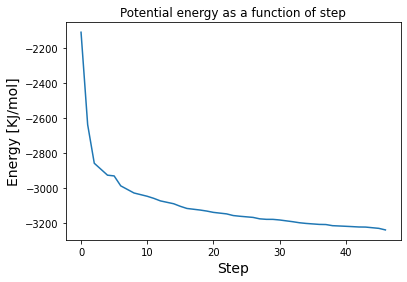

In [ ]:
import matplotlib.pyplot as plt # Import from the library matplotlib  the package pyplot and alias it as plt 
import numpy as np #import the library numpy and alias it as np
'''load the data from the potential.xvg format into data, ...
define the comments as raw starting with either # or @'''
data=np.loadtxt("cady_mini/potential.xvg",comments=["#","@"])
step=data[:,0] #assign the first column of data to the variable step
energy=data[:,1] #assign the second column of data to the variable potential
plt.plot(step,energy) #plot the function potential(data)
plt.xlabel("Step",size=14) #assign the x label 
plt.ylabel("Energy [KJ/mol]",size=14) #assign the y label
plt.title("Potential energy as a function of step"); #assign a title 
#save the figure in png format with a resolution of 300 dot per inch "dpi" 
plt.savefig("potential_steep_w.png",format="png", dpi=300)

In [ ]:
!cat cady_mini/posre.itp

; In this topology include file, you will find position restraint
; entries for all the heavy atoms in your original pdb file.
; This means that all the protons which were added by pdb2gmx are
; not restrained.

[ position_restraints ]
; atom  type      fx      fy      fz
     1     1  1000  1000  1000
     5     1  1000  1000  1000
     8     1  1000  1000  1000
     9     1  1000  1000  1000
    10     1  1000  1000  1000
    12     1  1000  1000  1000
    14     1  1000  1000  1000
    17     1  1000  1000  1000
    19     1  1000  1000  1000
    23     1  1000  1000  1000
    27     1  1000  1000  1000
    28     1  1000  1000  1000
    29     1  1000  1000  1000
    31     1  1000  1000  1000
    33     1  1000  1000  1000
    36     1  1000  1000  1000
    37     1  1000  1000  1000
    39     1  1000  1000  1000
    41     1  1000  1000  1000
    42     1  1000  1000  1000
    44     1  1000  1000  1000
    46     1  1000  1000  1000
    48     1  1000  1000  1000
    50     1  

In [ ]:
!gmx grompp -f cady_mini/template.mdp -c cady_mini/cadyvmin.gro -r cady_mini/cadyvmin.gro -p cady_mini/cady_1.top -o cady_mini/posres2.tpr -maxwarn 2

              :-) GROMACS - gmx grompp, 2020.1-Ubuntu-2020.1-1 (-:

                            GROMACS is written by:
     Emile Apol      Rossen Apostolov      Paul Bauer     Herman J.C. Berendsen
    Par Bjelkmar      Christian Blau   Viacheslav Bolnykh     Kevin Boyd    
 Aldert van Buuren   Rudi van Drunen     Anton Feenstra       Alan Gray     
  Gerrit Groenhof     Anca Hamuraru    Vincent Hindriksen  M. Eric Irrgang  
  Aleksei Iupinov   Christoph Junghans     Joe Jordan     Dimitrios Karkoulis
    Peter Kasson        Jiri Kraus      Carsten Kutzner      Per Larsson    
  Justin A. Lemkul    Viveca Lindahl    Magnus Lundborg     Erik Marklund   
    Pascal Merz     Pieter Meulenhoff    Teemu Murtola       Szilard Pall   
    Sander Pronk      Roland Schulz      Michael Shirts    Alexey Shvetsov  
   Alfons Sijbers     Peter Tieleman      Jon Vincent      Teemu Virolainen 
 Christian Wennberg    Maarten Wolf      Artem Zhmurov   
                           and the project leader

In [ ]:
!mkdir position2

In [ ]:
!gmx mdrun -s cady_mini/posres2.tpr -deffnm position2/posres2 -v -nt 12 

              :-) GROMACS - gmx mdrun, 2020.1-Ubuntu-2020.1-1 (-:

                            GROMACS is written by:
     Emile Apol      Rossen Apostolov      Paul Bauer     Herman J.C. Berendsen
    Par Bjelkmar      Christian Blau   Viacheslav Bolnykh     Kevin Boyd    
 Aldert van Buuren   Rudi van Drunen     Anton Feenstra       Alan Gray     
  Gerrit Groenhof     Anca Hamuraru    Vincent Hindriksen  M. Eric Irrgang  
  Aleksei Iupinov   Christoph Junghans     Joe Jordan     Dimitrios Karkoulis
    Peter Kasson        Jiri Kraus      Carsten Kutzner      Per Larsson    
  Justin A. Lemkul    Viveca Lindahl    Magnus Lundborg     Erik Marklund   
    Pascal Merz     Pieter Meulenhoff    Teemu Murtola       Szilard Pall   
    Sander Pronk      Roland Schulz      Michael Shirts    Alexey Shvetsov  
   Alfons Sijbers     Peter Tieleman      Jon Vincent      Teemu Virolainen 
 Christian Wennberg    Maarten Wolf      Artem Zhmurov   
                           and the project leaders

In [ ]:
!echo -e "Temperature" | gmx energy -f position2/posres2.edr -o position2/Temp_position2.xvg 

              :-) GROMACS - gmx energy, 2020.1-Ubuntu-2020.1-1 (-:

                            GROMACS is written by:
     Emile Apol      Rossen Apostolov      Paul Bauer     Herman J.C. Berendsen
    Par Bjelkmar      Christian Blau   Viacheslav Bolnykh     Kevin Boyd    
 Aldert van Buuren   Rudi van Drunen     Anton Feenstra       Alan Gray     
  Gerrit Groenhof     Anca Hamuraru    Vincent Hindriksen  M. Eric Irrgang  
  Aleksei Iupinov   Christoph Junghans     Joe Jordan     Dimitrios Karkoulis
    Peter Kasson        Jiri Kraus      Carsten Kutzner      Per Larsson    
  Justin A. Lemkul    Viveca Lindahl    Magnus Lundborg     Erik Marklund   
    Pascal Merz     Pieter Meulenhoff    Teemu Murtola       Szilard Pall   
    Sander Pronk      Roland Schulz      Michael Shirts    Alexey Shvetsov  
   Alfons Sijbers     Peter Tieleman      Jon Vincent      Teemu Virolainen 
 Christian Wennberg    Maarten Wolf      Artem Zhmurov   
                           and the project leader

In [ ]:
!mkdir dinamica1

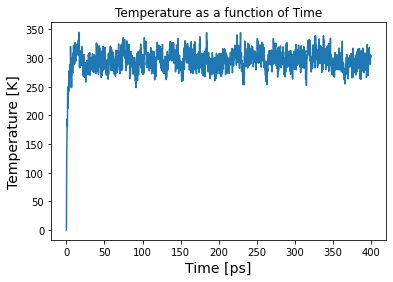

In [ ]:
import matplotlib.pyplot as plt # Import from the library matplotlib  the package pyplot and alias it as plt 
import numpy as np #import the library numpy and alias it as np
'''load the data from the potential.xvg format into data, ...
define the comments as raw starting with either # or @'''
data=np.loadtxt("position2/Temp_position2.xvg",comments=["#","@"])
step=data[:,0] #assign the first column of data to the variable step
energy=data[:,1] #assign the second column of data to the variable potential
plt.plot(step,energy) #plot the function potential(data)
plt.xlabel("Time [ps]",size=14) #assign the x label 
plt.ylabel("Temperature [K]",size=14) #assign the y label
plt.title("Temperature as a function of Time"); #assign a title 
#plt.xlim(1750,2000)
#save the figure in png format with a resolution of 300 dot per inch "dpi" 


In [ ]:
!mkdir dinamica3


In [4]:
!gmx grompp -f template.mdp -c posre2.gro -p cadyw.top -o cady_D2.tpr -maxwarn 2

              :-) GROMACS - gmx grompp, 2020.1-Ubuntu-2020.1-1 (-:

                            GROMACS is written by:
     Emile Apol      Rossen Apostolov      Paul Bauer     Herman J.C. Berendsen
    Par Bjelkmar      Christian Blau   Viacheslav Bolnykh     Kevin Boyd    
 Aldert van Buuren   Rudi van Drunen     Anton Feenstra       Alan Gray     
  Gerrit Groenhof     Anca Hamuraru    Vincent Hindriksen  M. Eric Irrgang  
  Aleksei Iupinov   Christoph Junghans     Joe Jordan     Dimitrios Karkoulis
    Peter Kasson        Jiri Kraus      Carsten Kutzner      Per Larsson    
  Justin A. Lemkul    Viveca Lindahl    Magnus Lundborg     Erik Marklund   
    Pascal Merz     Pieter Meulenhoff    Teemu Murtola       Szilard Pall   
    Sander Pronk      Roland Schulz      Michael Shirts    Alexey Shvetsov  
   Alfons Sijbers     Peter Tieleman      Jon Vincent      Teemu Virolainen 
 Christian Wennberg    Maarten Wolf      Artem Zhmurov   
                           and the project leader

In [5]:
!gmx mdrun -deffnm cady_D2 -s cady_D2.tpr -v -nt 12

              :-) GROMACS - gmx mdrun, 2020.1-Ubuntu-2020.1-1 (-:

                            GROMACS is written by:
     Emile Apol      Rossen Apostolov      Paul Bauer     Herman J.C. Berendsen
    Par Bjelkmar      Christian Blau   Viacheslav Bolnykh     Kevin Boyd    
 Aldert van Buuren   Rudi van Drunen     Anton Feenstra       Alan Gray     
  Gerrit Groenhof     Anca Hamuraru    Vincent Hindriksen  M. Eric Irrgang  
  Aleksei Iupinov   Christoph Junghans     Joe Jordan     Dimitrios Karkoulis
    Peter Kasson        Jiri Kraus      Carsten Kutzner      Per Larsson    
  Justin A. Lemkul    Viveca Lindahl    Magnus Lundborg     Erik Marklund   
    Pascal Merz     Pieter Meulenhoff    Teemu Murtola       Szilard Pall   
    Sander Pronk      Roland Schulz      Michael Shirts    Alexey Shvetsov  
   Alfons Sijbers     Peter Tieleman      Jon Vincent      Teemu Virolainen 
 Christian Wennberg    Maarten Wolf      Artem Zhmurov   
                           and the project leaders

In [6]:
!echo -e "Temperature" | gmx energy -f cady_D2.edr -o Temp2.xvg 

              :-) GROMACS - gmx energy, 2020.1-Ubuntu-2020.1-1 (-:

                            GROMACS is written by:
     Emile Apol      Rossen Apostolov      Paul Bauer     Herman J.C. Berendsen
    Par Bjelkmar      Christian Blau   Viacheslav Bolnykh     Kevin Boyd    
 Aldert van Buuren   Rudi van Drunen     Anton Feenstra       Alan Gray     
  Gerrit Groenhof     Anca Hamuraru    Vincent Hindriksen  M. Eric Irrgang  
  Aleksei Iupinov   Christoph Junghans     Joe Jordan     Dimitrios Karkoulis
    Peter Kasson        Jiri Kraus      Carsten Kutzner      Per Larsson    
  Justin A. Lemkul    Viveca Lindahl    Magnus Lundborg     Erik Marklund   
    Pascal Merz     Pieter Meulenhoff    Teemu Murtola       Szilard Pall   
    Sander Pronk      Roland Schulz      Michael Shirts    Alexey Shvetsov  
   Alfons Sijbers     Peter Tieleman      Jon Vincent      Teemu Virolainen 
 Christian Wennberg    Maarten Wolf      Artem Zhmurov   
                           and the project leader

(1750.0, 2000.0)

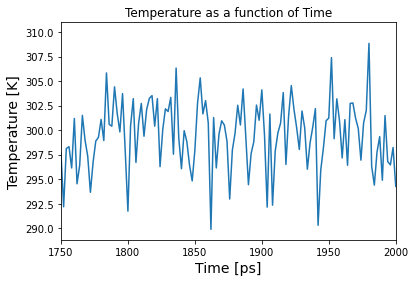

In [7]:
import matplotlib.pyplot as plt # Import from the library matplotlib  the package pyplot and alias it as plt 
import numpy as np #import the library numpy and alias it as np
'''load the data from the potential.xvg format into data, ...
define the comments as raw starting with either # or @'''
data=np.loadtxt("Temp2.xvg",comments=["#","@"])
step=data[:,0] #assign the first column of data to the variable step
energy=data[:,1] #assign the second column of data to the variable potential
plt.plot(step,energy) #plot the function potential(data)
plt.xlabel("Time [ps]",size=14) #assign the x label 
plt.ylabel("Temperature [K]",size=14) #assign the y label
plt.title("Temperature as a function of Time"); #assign a title 
plt.xlim(1750,2000)
#save the figure in png format with a resolution of 300 dot per inch "dpi" 

In [ ]:
! echo -e "0 \n" | gmx trjconv -s cadyv_D2.tpr -f cadyv_D2.trr -pbc mol -o cadyv_D_conv.trr -ur compact

             :-) GROMACS - gmx trjconv, 2020.1-Ubuntu-2020.1-1 (-:

                            GROMACS is written by:
     Emile Apol      Rossen Apostolov      Paul Bauer     Herman J.C. Berendsen
    Par Bjelkmar      Christian Blau   Viacheslav Bolnykh     Kevin Boyd    
 Aldert van Buuren   Rudi van Drunen     Anton Feenstra       Alan Gray     
  Gerrit Groenhof     Anca Hamuraru    Vincent Hindriksen  M. Eric Irrgang  
  Aleksei Iupinov   Christoph Junghans     Joe Jordan     Dimitrios Karkoulis
    Peter Kasson        Jiri Kraus      Carsten Kutzner      Per Larsson    
  Justin A. Lemkul    Viveca Lindahl    Magnus Lundborg     Erik Marklund   
    Pascal Merz     Pieter Meulenhoff    Teemu Murtola       Szilard Pall   
    Sander Pronk      Roland Schulz      Michael Shirts    Alexey Shvetsov  
   Alfons Sijbers     Peter Tieleman      Jon Vincent      Teemu Virolainen 
 Christian Wennberg    Maarten Wolf      Artem Zhmurov   
                           and the project leader

In [ ]:
! echo -e "0 \n" | gmx trjconv -s cadyv_D.tpr -f cadyv_D_conv.trr -pbc mol -o cadyv_D_conv.gro -ur compact

             :-) GROMACS - gmx trjconv, 2020.1-Ubuntu-2020.1-1 (-:

                            GROMACS is written by:
     Emile Apol      Rossen Apostolov      Paul Bauer     Herman J.C. Berendsen
    Par Bjelkmar      Christian Blau   Viacheslav Bolnykh     Kevin Boyd    
 Aldert van Buuren   Rudi van Drunen     Anton Feenstra       Alan Gray     
  Gerrit Groenhof     Anca Hamuraru    Vincent Hindriksen  M. Eric Irrgang  
  Aleksei Iupinov   Christoph Junghans     Joe Jordan     Dimitrios Karkoulis
    Peter Kasson        Jiri Kraus      Carsten Kutzner      Per Larsson    
  Justin A. Lemkul    Viveca Lindahl    Magnus Lundborg     Erik Marklund   
    Pascal Merz     Pieter Meulenhoff    Teemu Murtola       Szilard Pall   
    Sander Pronk      Roland Schulz      Michael Shirts    Alexey Shvetsov  
   Alfons Sijbers     Peter Tieleman      Jon Vincent      Teemu Virolainen 
 Christian Wennberg    Maarten Wolf      Artem Zhmurov   
                           and the project leader

In [ ]:
!cat Temp_cadyv.xvg

# This file was created Sat Mar  4 18:20:48 2023
# Created by:
#              :-) GROMACS - gmx energy, 2020.1-Ubuntu-2020.1-1 (-:
# 
# Executable:   /usr/bin/gmx
# Data prefix:  /usr
# Working dir:  /content
# Command line:
#   gmx energy -f cady_din/cadyv_D.edr -o cady_din/Temp_cadyv.xvg
# gmx energy is part of G R O M A C S:
#
# GROtesk MACabre and Sinister
#
@    title "GROMACS Energies"
@    xaxis  label "Time (ps)"
@    yaxis  label "(K)"
@TYPE xy
@ view 0.15, 0.15, 0.75, 0.85
@ legend on
@ legend box on
@ legend loctype view
@ legend 0.78, 0.8
@ legend length 2
@ s0 legend "Temperature"
    0.000000    0.128038
    2.000000  291.650665
    4.000000  274.556549
    6.000000  314.769531
    8.000000  291.098999
   10.000000  282.556274
   12.000000  318.529327
   14.000000  271.380859
   16.000000  313.596893
   18.000000  313.496552
   20.000000  293.303009
   22.000000  282.614746
   24.000000  322.329163
   26.000000  304.107208
   28.000000  309.578003
   30.000000  303.855194

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
comm=["#","@"]
temperature=np.loadtxt(f"Temp2.xvg",usecols=(1),comments=comm) 
v=temperature[875:1001]
print(v)
print(np.mean(v))
print(np.std(v))

[297.708496 292.184631 298.125946 298.31192  296.140961 301.184052
 294.528931 296.418152 301.504547 298.955261 297.338867 293.662598
 296.722839 298.880249 299.266174 301.089508 298.938965 305.832214
 300.590698 300.400299 304.413849 301.702179 299.818512 303.722351
 297.854309 291.738953 300.440948 303.208099 296.703979 300.717438
 302.72229  299.375214 302.119873 303.230347 303.520081 300.404358
 303.208557 296.281281 300.030151 302.172089 301.89798  303.336243
 297.54126  306.326996 299.148193 296.064392 299.944885 298.837738
 296.44873  294.82196  297.95401  302.753754 305.327087 301.652802
 303.008545 300.737427 289.884949 301.28363  296.145844 299.585938
 300.951538 300.522827 298.863739 292.974792 297.97403  299.68277
 302.535645 300.527344 304.197784 299.395325 294.437347 297.612793
 298.807495 302.554596 301.009369 304.102081 299.486877 292.152832
 301.641785 292.349762 297.857758 299.7258   300.707428 303.8284
 296.498901 301.454254 304.538239 302.120575 300.245056 298.03091

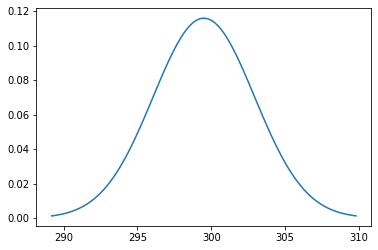

In [10]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import math
media = 299.5028039999999
deviazione_standard = 3.44087726843338
x = np.linspace(media - 3*deviazione_standard, media + 3*deviazione_standard, 100)
plt.plot(x, stats.norm.pdf(x, media, deviazione_standard))
plt.show()

In [ ]:
!echo -e "Backbone\nBackbone" | gmx rms -s cady_1.pdb -f dinamica3/cady_D2.trr -o dinamica3/rmsd_T2.xvg 

               :-) GROMACS - gmx rms, 2020.1-Ubuntu-2020.1-1 (-:

                            GROMACS is written by:
     Emile Apol      Rossen Apostolov      Paul Bauer     Herman J.C. Berendsen
    Par Bjelkmar      Christian Blau   Viacheslav Bolnykh     Kevin Boyd    
 Aldert van Buuren   Rudi van Drunen     Anton Feenstra       Alan Gray     
  Gerrit Groenhof     Anca Hamuraru    Vincent Hindriksen  M. Eric Irrgang  
  Aleksei Iupinov   Christoph Junghans     Joe Jordan     Dimitrios Karkoulis
    Peter Kasson        Jiri Kraus      Carsten Kutzner      Per Larsson    
  Justin A. Lemkul    Viveca Lindahl    Magnus Lundborg     Erik Marklund   
    Pascal Merz     Pieter Meulenhoff    Teemu Murtola       Szilard Pall   
    Sander Pronk      Roland Schulz      Michael Shirts    Alexey Shvetsov  
   Alfons Sijbers     Peter Tieleman      Jon Vincent      Teemu Virolainen 
 Christian Wennberg    Maarten Wolf      Artem Zhmurov   
                           and the project leaders:

In [ ]:
!echo -e "System" | gmx trjconv -s dinamica3/cady_D2.tpr -f dinamica3/cady_D2.trr -dump 2000 -o dinamica3/struct2ns.pdb 

             :-) GROMACS - gmx trjconv, 2020.1-Ubuntu-2020.1-1 (-:

                            GROMACS is written by:
     Emile Apol      Rossen Apostolov      Paul Bauer     Herman J.C. Berendsen
    Par Bjelkmar      Christian Blau   Viacheslav Bolnykh     Kevin Boyd    
 Aldert van Buuren   Rudi van Drunen     Anton Feenstra       Alan Gray     
  Gerrit Groenhof     Anca Hamuraru    Vincent Hindriksen  M. Eric Irrgang  
  Aleksei Iupinov   Christoph Junghans     Joe Jordan     Dimitrios Karkoulis
    Peter Kasson        Jiri Kraus      Carsten Kutzner      Per Larsson    
  Justin A. Lemkul    Viveca Lindahl    Magnus Lundborg     Erik Marklund   
    Pascal Merz     Pieter Meulenhoff    Teemu Murtola       Szilard Pall   
    Sander Pronk      Roland Schulz      Michael Shirts    Alexey Shvetsov  
   Alfons Sijbers     Peter Tieleman      Jon Vincent      Teemu Virolainen 
 Christian Wennberg    Maarten Wolf      Artem Zhmurov   
                           and the project leader

In [ ]:
!echo -e "Backbone\nBackbone" | gmx rms -s dinamica3/struct2ns.pdb -f dinamica3/cady_D2.trr -o dinamica3/rmsd_2ns.xvg 

               :-) GROMACS - gmx rms, 2020.1-Ubuntu-2020.1-1 (-:

                            GROMACS is written by:
     Emile Apol      Rossen Apostolov      Paul Bauer     Herman J.C. Berendsen
    Par Bjelkmar      Christian Blau   Viacheslav Bolnykh     Kevin Boyd    
 Aldert van Buuren   Rudi van Drunen     Anton Feenstra       Alan Gray     
  Gerrit Groenhof     Anca Hamuraru    Vincent Hindriksen  M. Eric Irrgang  
  Aleksei Iupinov   Christoph Junghans     Joe Jordan     Dimitrios Karkoulis
    Peter Kasson        Jiri Kraus      Carsten Kutzner      Per Larsson    
  Justin A. Lemkul    Viveca Lindahl    Magnus Lundborg     Erik Marklund   
    Pascal Merz     Pieter Meulenhoff    Teemu Murtola       Szilard Pall   
    Sander Pronk      Roland Schulz      Michael Shirts    Alexey Shvetsov  
   Alfons Sijbers     Peter Tieleman      Jon Vincent      Teemu Virolainen 
 Christian Wennberg    Maarten Wolf      Artem Zhmurov   
                           and the project leaders:

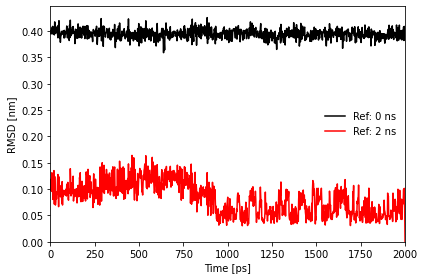

In [ ]:
# Load your data
time, rmsd = np.loadtxt('dinamica3/rmsd_T2.xvg',comments=['@','#'],unpack=True)
_, rmsd9 = np.loadtxt('dinamica3/rmsd_2ns.xvg',comments=['@','#'],unpack=True)
# Prepare the figure
fig = plt.figure()
ax = fig.add_subplot(111,)

# Plot your data
ax.plot(time,rmsd,label='Ref: 0 ns',c='k')
ax.plot(time,rmsd9,label='Ref: 2 ns',c='r')

# Adjust the plot and personalize
ax.set_xlim(time[0],time[-1])
m = np.max(np.concatenate((rmsd,rmsd9)))*1.05
ax.set_ylim(0,m)
ax.set_xlabel(r"Time [ps]")
ax.set_ylabel(r"RMSD [nm]")
ax.legend(frameon=False)

# This allows you to adjust the figure limits to make your figure nice
# (Recommended but not compulsory)
fig.tight_layout()




In [ ]:
!cat rmsd_T1.xvg

# This file was created Mon Mar  6 18:59:18 2023
# Created by:
#               :-) GROMACS - gmx rms, 2020.1-Ubuntu-2020.1-1 (-:
# 
# Executable:   /usr/bin/gmx
# Data prefix:  /usr
# Working dir:  /content
# Command line:
#   gmx rms -s cady_1.pdb -f cadyv_D.trr -o rmsd_T1.xvg
# gmx rms is part of G R O M A C S:
#
# Georgetown Riga Oslo Madrid Amsterdam Chisinau Stockholm
#
@    title "RMSD"
@    xaxis  label "Time (ps)"
@    yaxis  label "RMSD (nm)"
@TYPE xy
@ subtitle "Backbone after lsq fit to Backbone"
   0.0000000    1.0897853
   2.0000000    0.2499770
   4.0000000    0.2193403
   6.0000000    0.6406052
   8.0000000    1.1328281
  10.0000000    0.9228832
  12.0000000    0.4425933
  14.0000000    0.4868157
  16.0000000    0.5040500
  18.0000000    0.4945373
  20.0000000    0.7915366
  22.0000000    1.0644171
  24.0000000    1.0510486
  26.0000000    1.0461434
  28.0000000    1.0434806
  30.0000000    0.5313046
  32.0000000    0.5330431
  34.0000000    0.7643397
  36.0000000    0.5

In [ ]:
!echo "C-alpha" | gmx rmsf -f dinamica3/cady_D2.trr -s dinamica3/cady_D2.tpr -o dinamica3/rmsf2.xvg -res

               :-) GROMACS - gmx rmsf, 2020.1-Ubuntu-2020.1-1 (-:

                            GROMACS is written by:
     Emile Apol      Rossen Apostolov      Paul Bauer     Herman J.C. Berendsen
    Par Bjelkmar      Christian Blau   Viacheslav Bolnykh     Kevin Boyd    
 Aldert van Buuren   Rudi van Drunen     Anton Feenstra       Alan Gray     
  Gerrit Groenhof     Anca Hamuraru    Vincent Hindriksen  M. Eric Irrgang  
  Aleksei Iupinov   Christoph Junghans     Joe Jordan     Dimitrios Karkoulis
    Peter Kasson        Jiri Kraus      Carsten Kutzner      Per Larsson    
  Justin A. Lemkul    Viveca Lindahl    Magnus Lundborg     Erik Marklund   
    Pascal Merz     Pieter Meulenhoff    Teemu Murtola       Szilard Pall   
    Sander Pronk      Roland Schulz      Michael Shirts    Alexey Shvetsov  
   Alfons Sijbers     Peter Tieleman      Jon Vincent      Teemu Virolainen 
 Christian Wennberg    Maarten Wolf      Artem Zhmurov   
                           and the project leaders

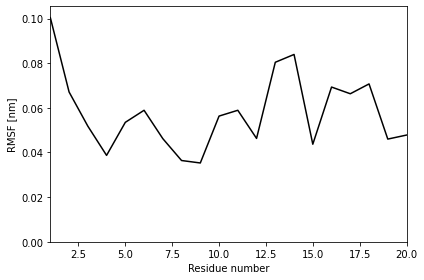

In [ ]:
res, rmsf = np.loadtxt('dinamica3/rmsf2.xvg',comments=['@','#'],unpack=True)

# Prepare the figure
fig = plt.figure()
ax = fig.add_subplot(111,)

# Plot your data
ax.plot(res,rmsf,c='k')

# Adjust the plot and personalize
ax.set_xlim(res[0],res[-1])
m = np.max(rmsf)*1.05
ax.set_ylim(0,m)
ax.set_xlabel(r"Residue number")
ax.set_ylabel(r"RMSF [nm]")

# This allows you to adjust the figure limits to make your figure nice
# (Recommended but not compulsory)
fig.tight_layout()



In [ ]:
!gmx hbond -h


              :-) GROMACS - gmx hbond, 2020.1-Ubuntu-2020.1-1 (-:

                            GROMACS is written by:
     Emile Apol      Rossen Apostolov      Paul Bauer     Herman J.C. Berendsen
    Par Bjelkmar      Christian Blau   Viacheslav Bolnykh     Kevin Boyd    
 Aldert van Buuren   Rudi van Drunen     Anton Feenstra       Alan Gray     
  Gerrit Groenhof     Anca Hamuraru    Vincent Hindriksen  M. Eric Irrgang  
  Aleksei Iupinov   Christoph Junghans     Joe Jordan     Dimitrios Karkoulis
    Peter Kasson        Jiri Kraus      Carsten Kutzner      Per Larsson    
  Justin A. Lemkul    Viveca Lindahl    Magnus Lundborg     Erik Marklund   
    Pascal Merz     Pieter Meulenhoff    Teemu Murtola       Szilard Pall   
    Sander Pronk      Roland Schulz      Michael Shirts    Alexey Shvetsov  
   Alfons Sijbers     Peter Tieleman      Jon Vincent      Teemu Virolainen 
 Christian Wennberg    Maarten Wolf      Artem Zhmurov   
                           and the project leaders

In [ ]:
!gmx hbond -f dinamica3/cady_D2.trr -s dinamica3/cady_D2.tpr -num dinamica3/legamiH2.xvg 

              :-) GROMACS - gmx hbond, 2020.1-Ubuntu-2020.1-1 (-:

                            GROMACS is written by:
     Emile Apol      Rossen Apostolov      Paul Bauer     Herman J.C. Berendsen
    Par Bjelkmar      Christian Blau   Viacheslav Bolnykh     Kevin Boyd    
 Aldert van Buuren   Rudi van Drunen     Anton Feenstra       Alan Gray     
  Gerrit Groenhof     Anca Hamuraru    Vincent Hindriksen  M. Eric Irrgang  
  Aleksei Iupinov   Christoph Junghans     Joe Jordan     Dimitrios Karkoulis
    Peter Kasson        Jiri Kraus      Carsten Kutzner      Per Larsson    
  Justin A. Lemkul    Viveca Lindahl    Magnus Lundborg     Erik Marklund   
    Pascal Merz     Pieter Meulenhoff    Teemu Murtola       Szilard Pall   
    Sander Pronk      Roland Schulz      Michael Shirts    Alexey Shvetsov  
   Alfons Sijbers     Peter Tieleman      Jon Vincent      Teemu Virolainen 
 Christian Wennberg    Maarten Wolf      Artem Zhmurov   
                           and the project leaders

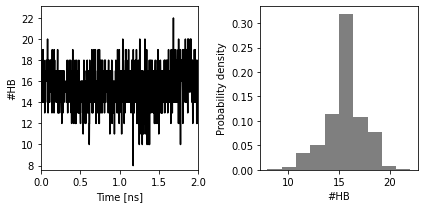

In [ ]:
time, d,_ = np.loadtxt('dinamica3/legamiH2.xvg',comments=['@','#'],unpack=True)
time = time/1000 # gmx distance gives output only in ps
fig = plt.figure(figsize=(6,3))
# in time
ax1 = fig.add_subplot(121,)
ax1.plot(time,d,c='k')
ax1.set_xlim(time[0],time[-1])
M = np.max(d)*1.05
m = np.min(d)*0.95
ax1.set_ylim(m,M)
ax1.set_xlabel(r"Time [ns]")
ax1.set_ylabel(r"#HB")

# histogram
ax2 = fig.add_subplot(122,)
ax2.hist(d,color='k',density=True,alpha=0.5)
ax2.set_ylabel(r"Probability density")
ax2.set_xlabel(r"#HB")
fig.tight_layout()



In [ ]:
%%bash
echo "r 1
r 20
q" | gmx make_ndx -f cady_1.pdb -o dinamica3/index2.ndx


Going to read 0 old index file(s)
Analysing residue names:
There are:    20    Protein residues
Analysing Protein...

  0 System              :   390 atoms
  1 Protein             :   390 atoms
  2 Protein-H           :   188 atoms
  3 C-alpha             :    20 atoms
  4 Backbone            :    60 atoms
  5 MainChain           :    81 atoms
  6 MainChain+Cb        :   100 atoms
  7 MainChain+H         :   103 atoms
  8 SideChain           :   287 atoms
  9 SideChain-H         :   107 atoms

 nr : group      '!': not  'name' nr name   'splitch' nr    Enter: list groups
 'a': atom       '&': and  'del' nr         'splitres' nr   'l': list residues
 't': atom type  '|': or   'keep' nr        'splitat' nr    'h': help
 'r': residue              'res' nr         'chain' char
 "name": group             'case': case sensitive           'q': save and quit
 'ri': residue index

> 

 10 r_1                 :     9 atoms

> 

 11 r_20                :    11 atoms

> 


             :-) GROMACS - gmx make_ndx, 2020.1-Ubuntu-2020.1-1 (-:

                            GROMACS is written by:
     Emile Apol      Rossen Apostolov      Paul Bauer     Herman J.C. Berendsen
    Par Bjelkmar      Christian Blau   Viacheslav Bolnykh     Kevin Boyd    
 Aldert van Buuren   Rudi van Drunen     Anton Feenstra       Alan Gray     
  Gerrit Groenhof     Anca Hamuraru    Vincent Hindriksen  M. Eric Irrgang  
  Aleksei Iupinov   Christoph Junghans     Joe Jordan     Dimitrios Karkoulis
    Peter Kasson        Jiri Kraus      Carsten Kutzner      Per Larsson    
  Justin A. Lemkul    Viveca Lindahl    Magnus Lundborg     Erik Marklund   
    Pascal Merz     Pieter Meulenhoff    Teemu Murtola       Szilard Pall   
    Sander Pronk      Roland Schulz      Michael Shirts    Alexey Shvetsov  
   Alfons Sijbers     Peter Tieleman      Jon Vincent      Teemu Virolainen 
 Christian Wennberg    Maarten Wolf      Artem Zhmurov   
                           and the project leade

In [ ]:
!cat index.ndx

[ System ]
   1    2    3    4    5    6    7    8    9   10   11   12   13   14   15
  16   17   18   19   20   21   22   23   24   25   26   27   28   29   30
  31   32   33   34   35   36   37   38   39   40   41   42   43   44   45
  46   47   48   49   50   51   52   53   54   55   56   57   58   59   60
  61   62   63   64   65   66   67   68   69   70   71   72   73   74   75
  76   77   78   79   80   81   82   83   84   85   86   87   88   89   90
  91   92   93   94   95   96   97   98   99  100  101  102  103  104  105
 106  107  108  109  110  111  112  113  114  115  116  117  118  119  120
 121  122  123  124  125  126  127  128  129  130  131  132  133  134  135
 136  137  138  139  140  141  142  143  144  145  146  147  148  149  150
 151  152  153  154  155  156  157  158  159  160  161  162  163  164  165
 166  167  168  169  170  171  172  173  174  175  176  177  178  179  180
 181  182  183  184  185  186  187  188  189  190  191  192  193  194  195
 196  197  198

In [ ]:
!gmx distance -f dinamica3/cady_D2.trr -s dinamica3/cady_D2.tpr -select 'com of group "r_1" plus com of group "r_20"' \
-n dinamica3/index2.ndx -oav dinamica3/distance2.xvg

             :-) GROMACS - gmx distance, 2020.1-Ubuntu-2020.1-1 (-:

                            GROMACS is written by:
     Emile Apol      Rossen Apostolov      Paul Bauer     Herman J.C. Berendsen
    Par Bjelkmar      Christian Blau   Viacheslav Bolnykh     Kevin Boyd    
 Aldert van Buuren   Rudi van Drunen     Anton Feenstra       Alan Gray     
  Gerrit Groenhof     Anca Hamuraru    Vincent Hindriksen  M. Eric Irrgang  
  Aleksei Iupinov   Christoph Junghans     Joe Jordan     Dimitrios Karkoulis
    Peter Kasson        Jiri Kraus      Carsten Kutzner      Per Larsson    
  Justin A. Lemkul    Viveca Lindahl    Magnus Lundborg     Erik Marklund   
    Pascal Merz     Pieter Meulenhoff    Teemu Murtola       Szilard Pall   
    Sander Pronk      Roland Schulz      Michael Shirts    Alexey Shvetsov  
   Alfons Sijbers     Peter Tieleman      Jon Vincent      Teemu Virolainen 
 Christian Wennberg    Maarten Wolf      Artem Zhmurov   
                           and the project leade

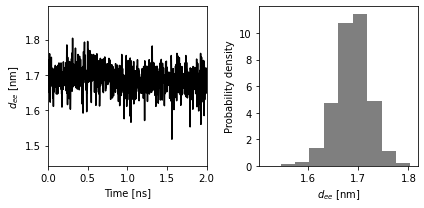

In [ ]:
time, d = np.loadtxt('dinamica3/distance2.xvg',comments=['@','#'],unpack=True)
time = time/1000 # gmx distance gives output only in ps
fig = plt.figure(figsize=(6,3))
# in time
ax1 = fig.add_subplot(121,)
ax1.plot(time,d,c='k')
ax1.set_xlim(time[0],time[-1])
M = np.max(d)*1.05
m = np.min(d)*0.95
ax1.set_ylim(m,M)
ax1.set_xlabel(r"Time [ns]")
ax1.set_ylabel(r"$d_{ee}$ [nm]")

# histogram
ax2 = fig.add_subplot(122,)
ax2.hist(d,color='k',density=True,alpha=0.5)
ax2.set_ylabel(r"Probability density")
ax2.set_xlabel(r"$d_{ee}$ [nm]")
fig.tight_layout()
